In [1]:
import tensorflow as tf
import os
from utils import *
from tacotron import Tacotron
from tqdm import tqdm

In [2]:
paths, lengths, texts, raw_texts = [], [], [], []
text_files = [f for f in os.listdir('mel') if f.endswith('.npy')]
for fpath in text_files:
    with open('%s/%s' % (path, fpath.replace('npy', 'txt'))) as fopen:
        text = fopen.read()
    paths.append(fpath.replace('.npy', ''))
    text = text_normalize(text)
    raw_texts.append(text)
    text = text + 'E'
    texts.append(np.array([char2idx[char] for char in text], np.int32))
    lengths.append(len(text))

In [3]:
paths[:2], lengths[:2], texts[:2]

(['YAF_burn_neutral', 'YAF_lose_happy'],
 [18, 18],
 [array([21,  3, 27,  2, 22, 10,  7,  2, 25, 17, 20,  6,  2,  4, 23, 20, 16,
          1], dtype=int32),
  array([21,  3, 27,  2, 22, 10,  7,  2, 25, 17, 20,  6,  2, 14, 17, 21,  7,
          1], dtype=int32)])

In [4]:
def dynamic_batching(paths):
    files, max_y, max_z = [], 0, 0
    for n in range(len(paths)):
        files.append(get_cached(paths[n]))
        if files[-1][0].shape[0] > max_y:
            max_y = files[-1][0].shape[0]
        if files[-1][1].shape[0] > max_z:
            max_z = files[-1][1].shape[0]
    return files, max_y, max_z

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Tacotron()
sess.run(tf.global_variables_initializer())

minibatch loop: 100%|██████████| 88/88 [00:40<00:00,  2.23it/s, cost=0.191]


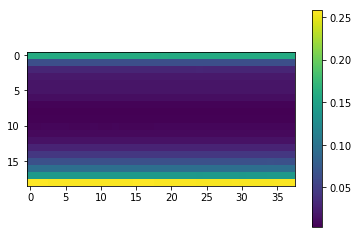

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.146]


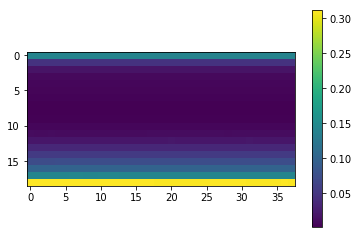

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.36it/s, cost=0.124]


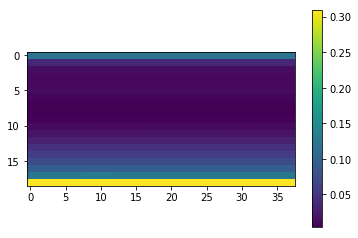

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.116]


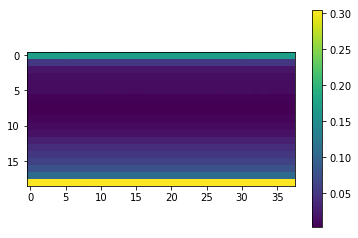

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.35it/s, cost=0.0952]


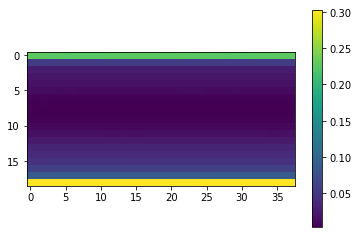

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.101]


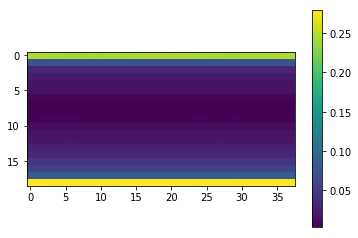

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.40it/s, cost=0.084]


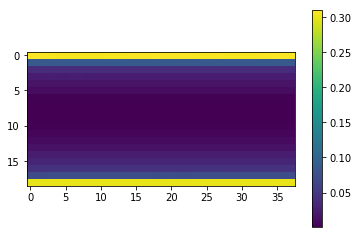

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0837]


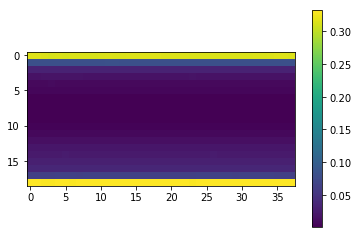

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0765]


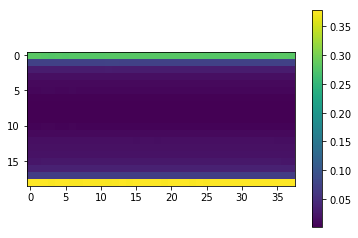

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.36it/s, cost=0.0723]


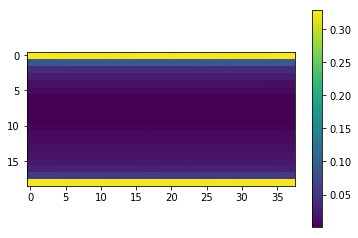

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.34it/s, cost=0.0717]


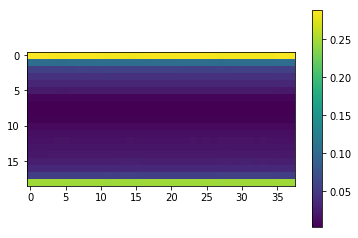

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.33it/s, cost=0.0721]


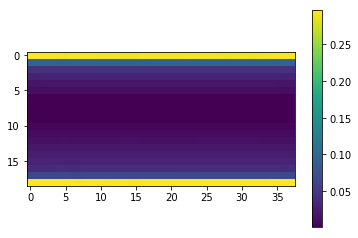

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0695]


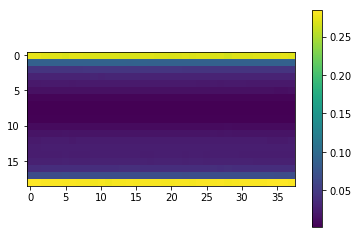

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.0684]


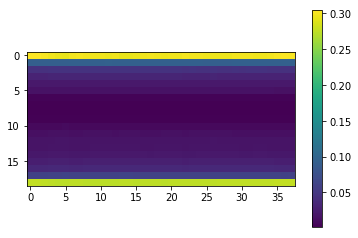

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.36it/s, cost=0.0662]


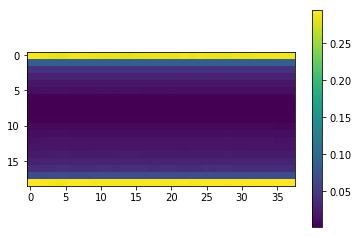

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.068] 


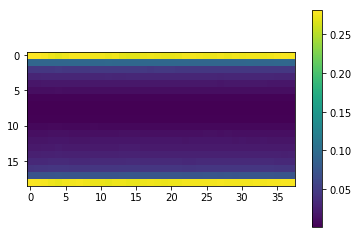

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.40it/s, cost=0.0686]


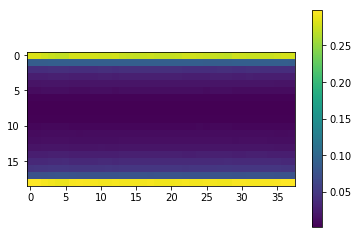

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.0683]


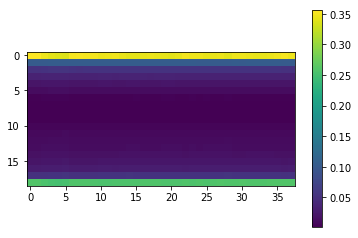

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0655]


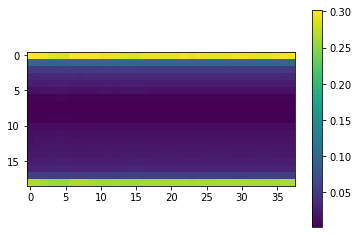

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.37it/s, cost=0.0636]


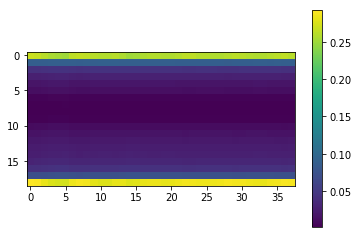

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.39it/s, cost=0.0635]


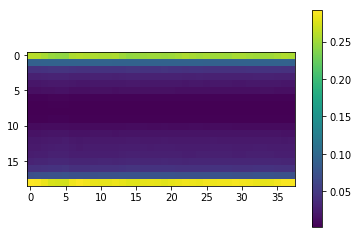

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.40it/s, cost=0.064] 


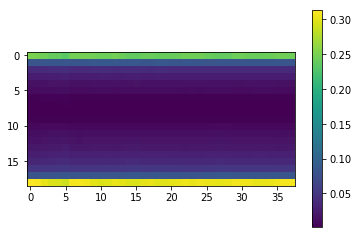

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0634]


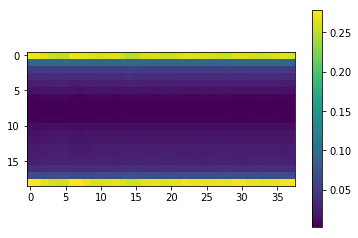

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.062] 


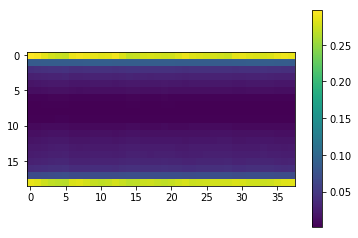

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.40it/s, cost=0.0613]


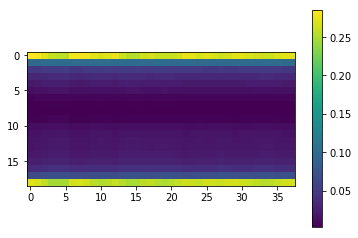

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.39it/s, cost=0.0617]


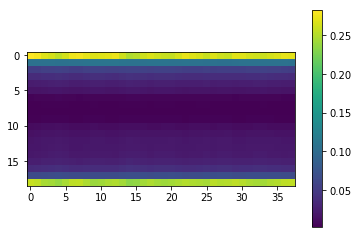

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.40it/s, cost=0.0617]


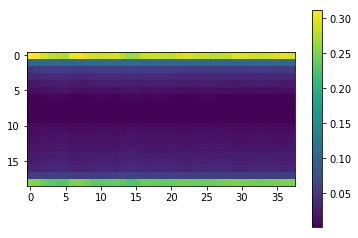

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.41it/s, cost=0.0604]


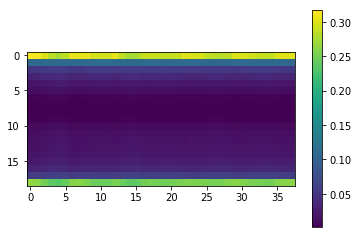

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.39it/s, cost=0.0599]


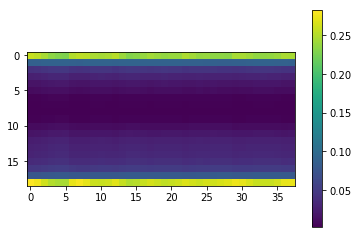

minibatch loop: 100%|██████████| 88/88 [00:38<00:00,  2.38it/s, cost=0.0602]


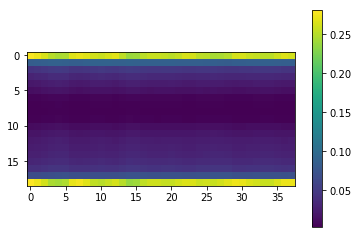

In [6]:
EPOCH = 30
for i in range(EPOCH):
    pbar = tqdm(range(0, len(paths), batch_size), desc = 'minibatch loop')
    for k in pbar:
        index = min(k + batch_size, len(paths))
        files, max_y, max_z = dynamic_batching(paths[k:index])
        max_x = max(lengths[k:index])
        batch_x = np.zeros((batch_size, max_x))
        batch_y = np.zeros((batch_size, max_y, n_mels * resampled))
        batch_z = np.zeros((batch_size, max_z, fourier_window_size // 2 + 1))
        for n in range(len(files)):
            batch_x[n, :] = np.pad(
                texts[k + n],
                ((0, max_x - texts[k + n].shape[0])),
                mode = 'constant',
            )
            batch_y[n, :, :] = np.pad(
                files[n][0],
                ((0, max_y - files[n][0].shape[0]), (0, 0)),
                mode = 'constant',
            )
            batch_z[n, :, :] = np.pad(
                files[n][1],
                ((0, max_z - files[n][1].shape[0]), (0, 0)),
                mode = 'constant',
            )
        _, cost = sess.run(
            [model.optimizer, model.loss],
            feed_dict = {model.X: batch_x, model.Y: batch_y, model.Z: batch_z},
        )
        pbar.set_postfix(cost = cost)
    align = sess.run(
        model.alignments, feed_dict = {model.X: batch_x, model.Y: batch_y}
    )
    plot_alignment(align[0, :, :])

In [7]:
y_hat = np.zeros((1, 200, n_mels * resampled), np.float32)
for j in tqdm(range(200)):
    _y_hat = sess.run(model.Y_hat, {model.X: [texts[0]], model.Y: y_hat})
    y_hat[:, j, :] = _y_hat[:, j, :]

100%|██████████| 200/200 [00:26<00:00,  7.55it/s]


In [8]:
mags = sess.run(model.Z_hat, {model.Y_hat: y_hat})

In [9]:
audio = spectrogram2wav(mags[0])

In [10]:
from scipy.io.wavfile import write
print('saving: %s'%(raw_texts[0]))
write(os.path.join('test.wav'), sample_rate, audio)

saving: say the word burn
